# Predictive Modeling: Lagos Air Pollution & Respiratory Cases

This notebook contains the predictive modeling phase of the Lagos Air Pollution & Respiratory Cases project.  
We apply machine learning and time series forecasting techniques to understand and predict respiratory cases based on pollutant data.

**Workflow:**
1. Imports & Setup  
2. Load Processed Data  
3. Prepare Features & Targets  
4. Model Training (Linear Regression, Random Forest)  
5. Evaluation & Feature Importance  
6. Time Series Forecasting (Prophet, ARIMA)  
7. Results Summary


## Import Packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Imports & Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Global plot style
plt.rcParams.update({'font.size': 12, 'figure.figsize': (10,6)})
sns.set_style('whitegrid')




##  Load Processed Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EDA_air_pollution_data.csv')

## Checking data

In [ ]:
df.head(10)

,city,date,pm2_5,pm10,no2,so2,o3,hospital_id,respiratory_cases,avg_age_of_patients,weather_temperature,weather_humidity,wind_speed,rainfall_mm,population_density,industrial_activity_index,year,month,season
0,Ikeja,2021-01-01,65.64,135.39,45.21,22.29,34.84,HOSP_IKE_1,16,44.0,25.1,40.0,3.1,2.2,22937.7,0.87,2021,1,Dry
1,Ikeja,2021-01-01,76.49,116.65,50.01,10.20,32.19,HOSP_IKE_4,12,33.1,25.3,53.5,3.8,2.2,21787.8,0.32,2021,1,Dry
2,Ikeja,2021-01-01,55.50,101.72,39.10,21.91,49.99,HOSP_IKE_1,20,33.5,27.7,72.3,4.7,1.0,14798.0,0.78,2021,1,Dry
3,Ikeja,2021-01-01,56.37,138.53,46.40,28.13,24.89,HOSP_IKE_8,15,49.3,32.8,62.9,4.8,8.2,18013.6,0.24,2021,1,Dry
4,Ikeja,2021-01-01,93.77,123.73,59.55,11.82,29.73,HOSP_IKE_3,20,45.4,27.9,64.8,3.4,9.1,25980.3,0.30,2021,1,Dry
5,Ikeja,2021-01-01,117.80,92.66,42.29,29.29,52.29,HOSP_IKE_1,17,24.1,31.9,75.9,2.1,6.0,15656.5,0.56,2021,1,Dry
6,Ikeja,2021-01-01,44.28,95.33,59.77,15.18,43.32,HOSP_IKE_9,15,35.0,29.2,56.6,4.0,0.8,22908.9,0.55,2021,1,Dry
7,Ikeja,2021-01-01,72.54,32.27,33.55,17.15,31.27,HOSP_IKE_3,15,42.6,28.0,74.0,1.9,4.1,20353.4,0.48,2021,1,Dry
8,Ikeja,2021-01-01,66.59,99.63,44.77,20.85,27.39,HOSP_IKE_3,15,34.8,32.6,77.4,4.3,1.2,26901.3,0.32,2021,1,Dry
9,Ikeja,2021-01-01,41.08,81.13,60.03,28.41,39.78,HOSP_IKE_4,11,21.3,26.8,52.3,2.1,6.1,18177.3,0.25,2021,1,Dry


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258420 entries, 0 to 258419
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   city                       258420 non-null  object 
 1   date                       258420 non-null  object 
 2   pm2_5                      258420 non-null  float64
 3   pm10                       258420 non-null  float64
 4   no2                        258420 non-null  float64
 5   so2                        258420 non-null  float64
 6   o3                         258420 non-null  float64
 7   hospital_id                258420 non-null  object 
 8   respiratory_cases          258420 non-null  int64  
 9   avg_age_of_patients        258420 non-null  float64
 10  weather_temperature        258420 non-null  float64
 11  weather_humidity           258420 non-null  float64
 12  wind_speed                 258420 non-null  float64
 13  rainfall_mm                25

In [ ]:
# Make sure date is datetime
df['date'] = pd.to_datetime(df['date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258420 entries, 0 to 258419
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   city                       258420 non-null  object        
 1   date                       258420 non-null  datetime64[ns]
 2   pm2_5                      258420 non-null  float64       
 3   pm10                       258420 non-null  float64       
 4   no2                        258420 non-null  float64       
 5   so2                        258420 non-null  float64       
 6   o3                         258420 non-null  float64       
 7   hospital_id                258420 non-null  object        
 8   respiratory_cases          258420 non-null  int64         
 9   avg_age_of_patients        258420 non-null  float64       
 10  weather_temperature        258420 non-null  float64       
 11  weather_humidity           258420 non-null  float64 

## Feature Engineering


In [ ]:
# Select city
city = 'Ikeja'
city_df = df[df['city'] == city].copy()

In [ ]:
# Define max lag based on EDA
max_lag = 7
pollutants = ['pm2_5', 'pm10', 'no2', 'so2', 'o3']
weather_vars = ['weather_temperature', 'weather_humidity', 'wind_speed', 'rainfall_mm']

In [ ]:
# Create lagged features for pollutants and weather
for feature in pollutants + weather_vars:
    for lag in range(max_lag + 1):
        city_df[f'{feature}_lag{lag}'] = city_df[feature].shift(lag)

In [ ]:
# Drop rows with NaN due to lagging
model_df = city_df.dropna(subset=[f'{feature}_lag{max_lag}' for feature in pollutants + weather_vars] + ['respiratory_cases'])

In [ ]:
# Features and target
lagged_features = [col for col in model_df.columns if '_lag' in col]
target = 'respiratory_cases'

X = model_df[lagged_features]
y = model_df[target]

In [ ]:
# Time-based train/test split (80% train, 20% test)
split_idx = int(len(model_df) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

## Model Training

In [ ]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [ ]:
# Train random forest Regression
rf = RandomForestRegressor(
    n_estimators=50,       # fewer trees
    max_depth=15,          # limit depth
    max_features='sqrt',   # limit features per split
    n_jobs=-1,             # use all CPU cores
    random_state=42
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [ ]:
import os

save_dir = 'plots/modeling/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


## 5. Evaluation & Feature Importance


In [ ]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} Evaluation:')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}\n')
    return rmse, r2

rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr, 'Linear Regression')
rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, 'Random Forest')


Linear Regression Evaluation:
RMSE: 3.71
R²: 0.04

Random Forest Evaluation:
RMSE: 3.73
R²: 0.03



In [ ]:
# Plot feature importance for Random Forest
importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=lagged_features).sort_values(ascending=False)

In [ ]:
# Show top 5 features in the console
print("Top 5 Features:")
print(feat_importance.head(5))

Top 5 Features:
pm2_5_lag0    0.107026
no2_lag5      0.015699
pm10_lag1     0.014943
pm10_lag2     0.014822
pm2_5_lag2    0.014616
dtype: float64


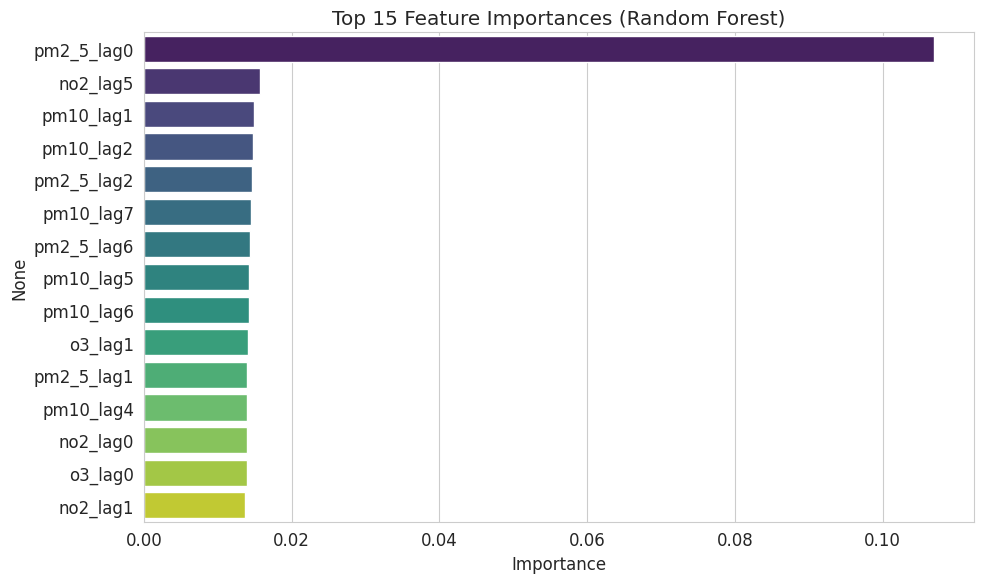

In [ ]:
# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance.values[:15], y=feat_importance.index[:15], palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.tight_layout()


plt.savefig(f'{save_dir}{city}_rf_feature_importance.png')
plt.show()


## 6.1 Forecasting with Prophet


# Time Series Forecasting of Respiratory Cases Using Prophet

In this section, we will use the Prophet library to forecast future respiratory cases in Ikeja city. Prophet automatically models trends and seasonal patterns, making it suitable for our health-related time series data.

---

## Steps Covered:

- Fit a Prophet model on historical respiratory cases.
- Generate a forecast for the next 30 days.
- Visualize the forecast and its components (trend and seasonality).

---

## Code Implementation


In [ ]:
# create the model
model = Prophet(yearly_seasonality=True, daily_seasonality=False)


In [ ]:
# Aggregate respiratory cases by date (mean if multiple records per day)
daily_cases = city_df.groupby('date')['respiratory_cases'].mean().reset_index()

In [ ]:
# Rename columns to fit Prophet's expected input format
prophet_df = daily_cases.rename(columns={'date': 'ds', 'respiratory_cases': 'y'})

In [ ]:
# Initialize the Prophet model
# yearly_seasonality=True to capture annual patterns
# daily_seasonality=False because daily patterns are less likely in this dataset

model = Prophet(yearly_seasonality=True, daily_seasonality=False)

In [ ]:
# Fit the model on the historical respiratory cases data
model.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1noqrcl/1qvte5j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn1noqrcl/w0ocf5nh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97225', 'data', 'file=/tmp/tmpn1noqrcl/1qvte5j1.json', 'init=/tmp/tmpn1noqrcl/w0ocf5nh.json', 'output', 'file=/tmp/tmpn1noqrcl/prophet_modela718a88u/prophet_model-20250811055926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:59:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:59:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a DataFrame to hold predictions for the next 30 days after the last date
future = model.make_future_dataframe(periods=30)

In [ ]:
# Use the model to make predictions
forecast = model.predict(future)

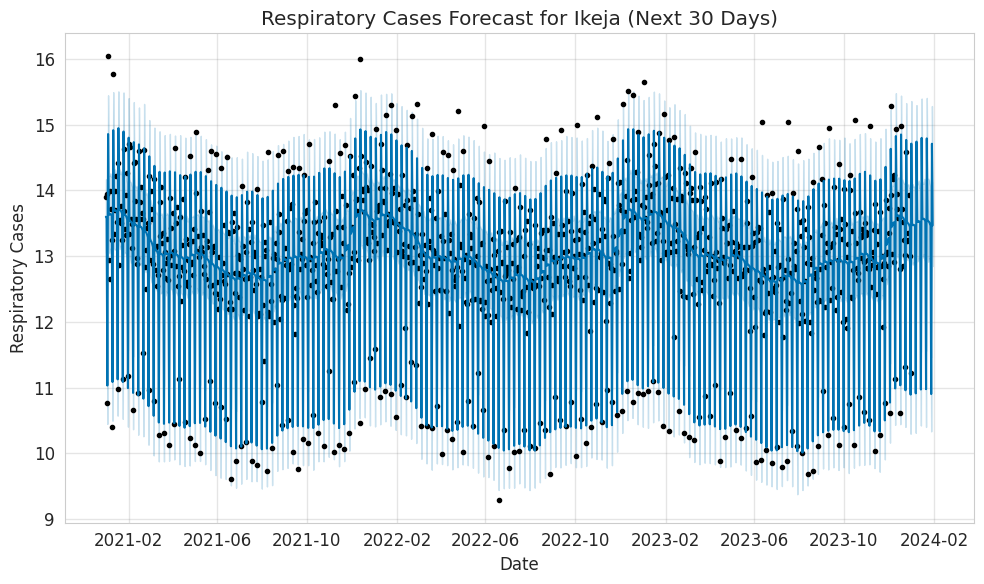

In [ ]:
# Plot the forecast (includes historical data + predicted future)
model.plot(forecast)
plt.title(f'Respiratory Cases Forecast for {city} (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Respiratory Cases')
plt.tight_layout()
plt.show()

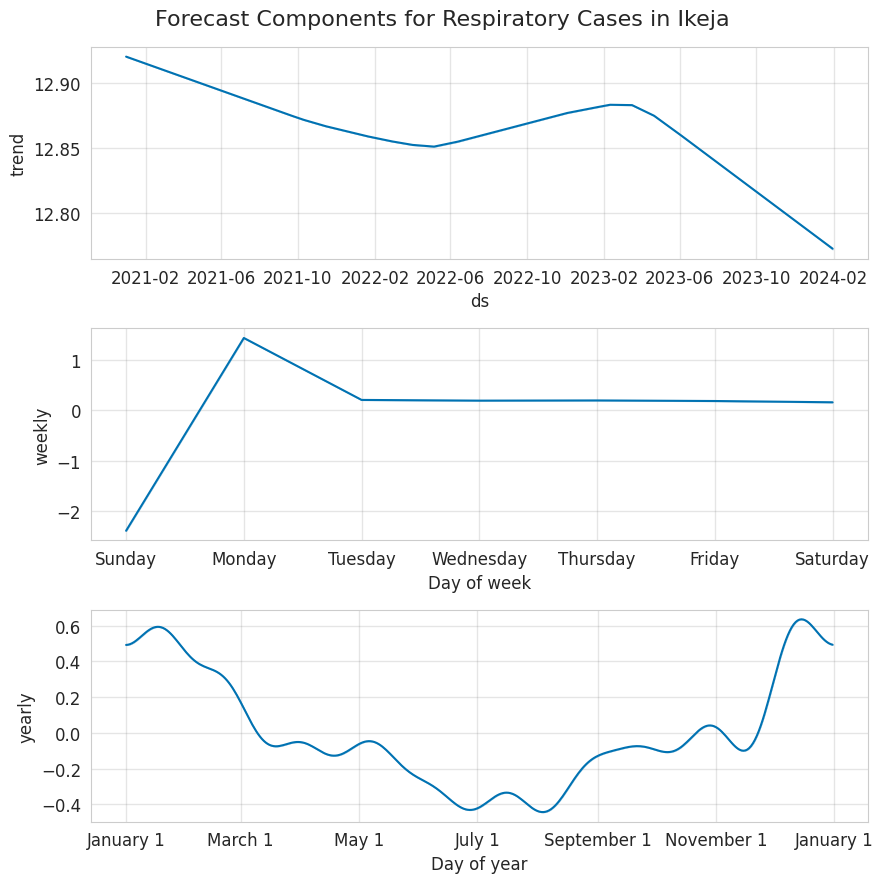

In [ ]:
# Plot forecast components to visualize trend and yearly seasonality
model.plot_components(forecast)
plt.suptitle(f'Forecast Components for Respiratory Cases in {city}', fontsize=16)
plt.tight_layout()
plt.show()

## 6.2 Forecasting with ARIMA


# Time Series Forecasting of Respiratory Cases Using ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a classical time series forecasting method that models the data based on its own past values, differences, and past forecast errors.

---

## Steps Covered:

- Prepare the respiratory cases time series data.
- Use differencing to make the series stationary.
- Identify optimal ARIMA parameters using ACF and PACF plots.
- Fit the ARIMA model.
- Forecast future respiratory cases.
- Visualize actual vs forecasted values.

---

## Code Implementation


In [ ]:
# Aggregate respiratory cases by date (mean if multiple entries)
daily_cases = city_df.groupby('date')['respiratory_cases'].mean()

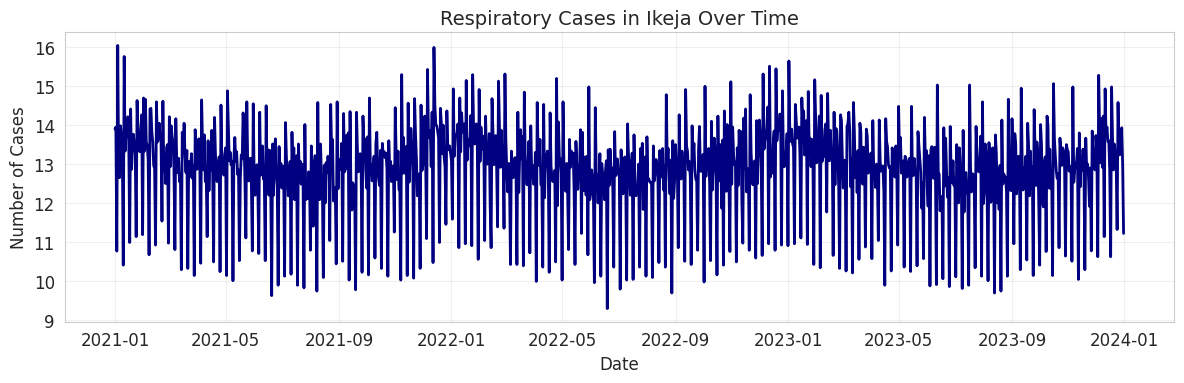

In [ ]:
#Plot original series
plt.figure(figsize=(12,4))
plt.plot(daily_cases, color='navy', linewidth=2)
plt.title(f"Respiratory Cases in {city} Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


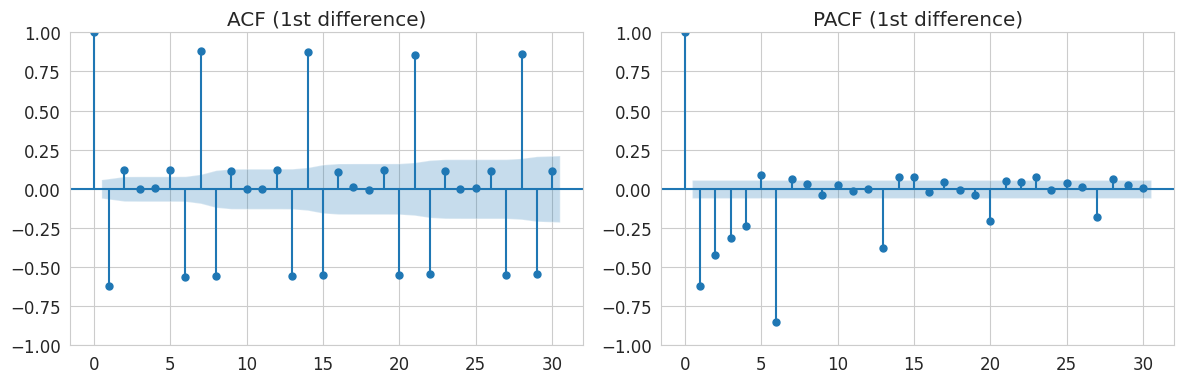

In [ ]:
# Check stationarity visually - plot ACF and PACF to help identify AR and MA terms
fig, axes = plt.subplots(1, 2, figsize=(12,4))

plot_acf(daily_cases.diff().dropna(), lags=30, ax=axes[0])
axes[0].set_title('ACF (1st difference)')

plot_pacf(daily_cases.diff().dropna(), lags=30, ax=axes[1])
axes[1].set_title('PACF (1st difference)')

plt.tight_layout()
plt.show()



In [ ]:
# Fit ARIMA model
# Based on ACF/PACF, start with order=(1,1,1)
model = ARIMA(daily_cases, order=(1,1,1))
model_fit = model.fit()

# Print summary for model diagnostics
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:      respiratory_cases   No. Observations:                 1095
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1678.558
Date:                Mon, 11 Aug 2025   AIC                           3363.116
Time:                        05:59:30   BIC                           3378.108
Sample:                    01-01-2021   HQIC                          3368.789
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3418      0.034    -10.178      0.000      -0.408      -0.276
ma.L1         -0.9573      0.009   -102.103      0.000      -0.976      -0.939
sigma2         1.2559      0.045     27.651      0.0

In [ ]:
# Forecast next 30 days
forecast_steps = 30
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=daily_cases.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

In [ ]:
# Forecast mean and confidence intervals
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

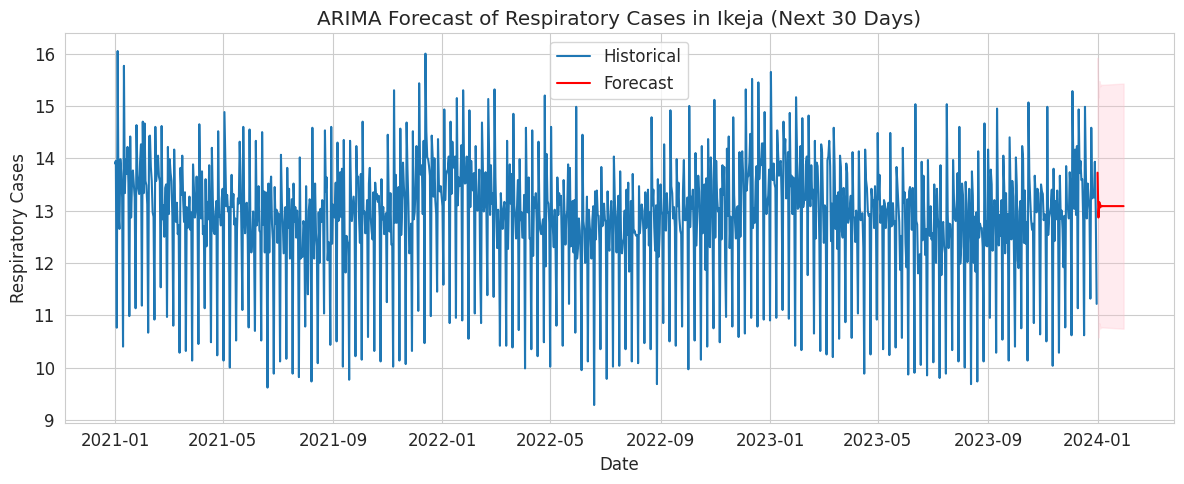

In [ ]:
# Plot actual and forecasted values
plt.figure(figsize=(12,5))
plt.plot(daily_cases, label='Historical')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:,0], conf_int.iloc[:,1], color='pink', alpha=0.3)
plt.title(f'ARIMA Forecast of Respiratory Cases in {city} (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Respiratory Cases')
plt.legend()
plt.tight_layout()
plt.show()

## Results Summary

| **Category**                | **Method**            | **Findings**                                                                                                      | **Insights & Recommendations**                                                                                                                       |
| --------------------------- | --------------------- | ------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Predictive Modelling**    | **Linear Regression** | R² ≈ 0.04, RMSE ≈ 3.7 — low predictive performance.                                                               | Simple linear models with lagged features are insufficient to capture complex relationships.                                                          |
|                             | **Random Forest**     | R² ≈ 0.03, RMSE ≈ 3.7 — poor performance, but identified key predictors. Top: PM2.5 (lag 0), NO₂ (lag 5), PM10 (lag 1 & 2), PM2.5 (lag 2). | Pollutant levels on the same day and previous days are influential. Needs more relevant features to improve accuracy.                                  |
| **Time Series Forecasting** | **Prophet**           | Captured yearly seasonality in Ikeja respiratory cases. Forecast shows seasonal fluctuations.                      | Good for understanding seasonal patterns and generating trend forecasts.                                                                              |
|                             | **ARIMA (1,1,1)**     | Forecast aligns closely with historical data, with 30-day confidence intervals.                                    | Reliable for short-term forecasting and understanding temporal dependencies.                                                                          |
| **Overall**                 | —                     | Predictive models underperformed; time series captured patterns well.                                              | Use time series models (Prophet, ARIMA) for forecasting respiratory cases. Pollutant levels remain important predictors.                               |
